# 5. Variables, Gradients, Placeholders

So far, all we have done could've been implemented in Numpy. The real power of TensorFlow is in being able to take a gradient with respect to (almost) any variables you create. The function can be a linear regression, a neural network, or an ensemble of neural networks, as long as the functions in the computation graph are differentiable. You can for example solve [partial differential equations](https://www.tensorflow.org/tutorials/pdes).

## Variables vs Constants
What's the difference between variables and constants? As the name suggests, variables are mutable, whereas constants are not. To see this, let's look at a simple exmaple.

Consider a situation where you would like to update the values of a matrix. Using [`tf.scatter_update`](https://www.tensorflow.org/api_docs/python/tf/scatter_update), this can be written as:

In [1]:
import tensorflow as tf

const   = tf.constant([1,2,13,97,5,6])
indices = tf.constant([2,3])
values  = tf.constant([3,4])

## This throws an error ## 
sparse_update = tf.scatter_update(const, indices, values) 

TypeError: 'ScatterUpdate' Op requires that input 'ref' be a mutable tensor (e.g.: a tf.Variable)

Oops! What's wrong here? As the error suggets, `const_mat` is not a mutable tensor. Kindly, the error suggests using a `tf.Variable`. Let's use that instead: 

In [2]:
var     = tf.Variable([1,2,13,97,5,6])
indices = tf.constant([2,3])
values  = tf.constant([3,4])

updated_var = tf.scatter_update(var, indices, values) 

Nice! It works now. As you have just seen, you need to use `tf.Variables` whenever you have to mutate the tensors. This includes using gradients to update the values e.g. in neural networks. We will see `tf.Variables` quite a bit in the coming sections. Now, let's evaluate the updated values and see if it's what we wanted. Let's initialize a session and run the tensor:

In [3]:
with tf.Session() as sess:
    ## This throws an error ## 
    print(sess.run(updated_var))

FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[Node: ScatterUpdate_1 = ScatterUpdate[T=DT_INT32, Tindices=DT_INT32, _class=["loc:@Variable"], use_locking=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Variable, Const_3, Const_4)]]

Caused by op 'ScatterUpdate_1', defined at:
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-6985616cf3c8>", line 5, in <module>
    updated_var = tf.scatter_update(var, indices, values)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tensorflow/python/ops/gen_state_ops.py", line 597, in scatter_update
    name=name)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable
	 [[Node: ScatterUpdate_1 = ScatterUpdate[T=DT_INT32, Tindices=DT_INT32, _class=["loc:@Variable"], use_locking=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Variable, Const_3, Const_4)]]


Another error! This is because, whenever you have variables, you have to `initialize` them. To initialize all variables, you can run `tf.global_variables_initializer()`:

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(updated_var))

[1 2 3 4 5 6]


Nice! We have an updated vector that we wanted :)

##  Gradients

Once you build a computation graph, you ca use `tf.gradients` to calculate gradients of most values. Let's start with a simple example.

Let  $f(a) = 2a^2+a$. What is $f'(8)$?

In [5]:
a = tf.constant(8.0)
fa = 2 * (a ** 2) + a
gfa = tf.gradients(fa, a)

In [6]:
with tf.Session() as sess:
    print(sess.run(gfa))

[33.0]


The function can be very complicated. TensorFlow can easily do derivatives we can't do by hand.

Let $g(a) = sin(a)^{42} + tanh(a)-e^{a^{-\pi}}$. What is $g'(8)$?

In [7]:
import math
a = tf.constant(8.0)
ga = tf.sin(a) ** 42 + tf.tanh(a) - tf.exp(a ** (-math.pi))
gga = tf.gradients(ga, a)

In [8]:
with tf.Session() as sess:
    print(sess.run(gga))

[-3.9404514]


You can also take derivatives with respect to specific variables. This means that TensorFlow can operate chain rules. This is crucial for e.g. back propagation in training neural networks.

Let $b = 2a$. What is the derivative of $a+b$ w.r.t $a,b$, evaluated at $a=1$?

In [9]:
a = tf.constant(1.)
b = 2 * a
gc = tf.gradients(a+b, [a, b])

In [10]:
with tf.Session() as sess:
    print(sess.run(gc))

[3.0, 1.0]


Let $b = 2a + 3$, $c = sigmoid(b)$. What is the derivative of $c$ w.r.t $a,b$, evaluated at $a=1$?

In [11]:
a = tf.constant(1.0)
b = 2 * a + 3
c = tf.sigmoid(b)
gc = tf.gradients(c, [a, b])

In [12]:
with tf.Session() as sess:
    print(sess.run(gc))

[0.013296066, 0.0066480329]


## Placeholders
`tf.placeholder` creates a "placeholder" that will be fed with some data during the execution, namely, inside the session. Let's look at a simple example:

In [13]:
# create a placeholder for a vector of 3 elements, type tf.float32
a = tf.placeholder(tf.float32, shape=[3])
b = tf.constant([5, 5, 5], tf.float32)
# use the placeholder as you would a constant or a variable
c = a + b
with tf.Session() as sess:
    ## This throws an error ## 
    print(sess.run(c))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [3]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[3], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-c7fd00d89770>", line 2, in <module>
    a = tf.placeholder(tf.float32, shape=[3])
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/kojin/anaconda/envs/tensorflow_workshop/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [3]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[3], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


Oops! What's wrong with this code? Well, we defined a placeholder for something. So we need feed that something during the execution. We do using the `feed_dict` parameter which takes in a dictionary, where the keys are the names of all the placeholders defined in the graph and the values are the values we would like to feed in. In this case,

In [14]:
with tf.Session() as sess:
    print(sess.run(c, feed_dict={a: [1, 2, 3]})) # use feed_dict

[ 6.  7.  8.]


You can pass in a matrix in a similar way, by specifing the shape. Note that shapes can be `None`. This means that we don't specify the dimension of that axis. This is useful when the values we will feed in can change shapes.

In [15]:
a = tf.placeholder(tf.float32, shape=[None,3]) # create a placeholder for a matrix
b = tf.constant([5, 5, 5], tf.float32)
c = a + b
with tf.Session() as sess:
    print(sess.run(c, feed_dict={a: [[1, 2, 3]]})) # shape=[1,3] (not [3,])
    print(sess.run(c, feed_dict={a: [[1, 2, 3],[4, 5, 6],[7, 8, 9]]})) # shape=[3,3]

[[ 6.  7.  8.]]
[[  6.   7.   8.]
 [  9.  10.  11.]
 [ 12.  13.  14.]]


Placeholders are useful because, for example when training neural networks, we are passing in different batches to a same network. In such a case, it is conveninent to define the data tensor as a `tf.placeholder`. As a final example, you can use a Python `for` to feed different values to placeholders. This will be used a lot in minibatch settings.

In [16]:
a = tf.placeholder(tf.float32)
b = 2 ** a
with tf.Session() as sess:
    for a_val in range(10):
        print(sess.run(b, {a: a_val}))
 

1.0
2.0
4.0
8.0
16.0
32.0
64.0
128.0
256.0
512.0


## Exercise

Let $g(a) = sin(a)^{282} + tanh(282+a)-e^{a^{-\pi}}$. Plot $g'(a)$ using what we learned about `gradients`, `placeholders`. 

In [17]:
import math
gga_nums = []

def gga(a):
    ga = tf.sin(a) ** 282 + tf.tanh(282+a) - tf.exp(a ** (-math.pi))
    return tf.gradients(ga, a)
a = tf.placeholder(tf.float32)
gga_a = gga(a)

In [19]:
import numpy as np
gga_nums = []
with tf.Session() as sess:
    for i in np.arange(1,15,0.1):
        gga_nums.append(sess.run(gga_a,feed_dict={a: i}))

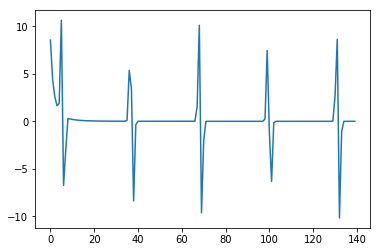

In [21]:
import matplotlib.pyplot as plt
plt.plot(gga_nums)
plt.show()